<a href="https://colab.research.google.com/github/yanLearning/DeepLearning/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1.0
Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


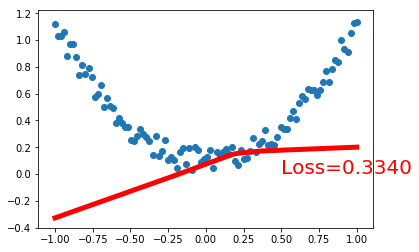

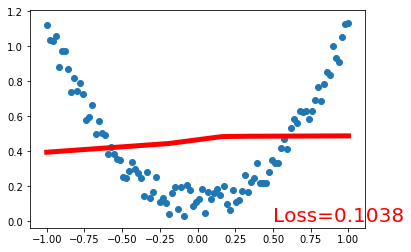

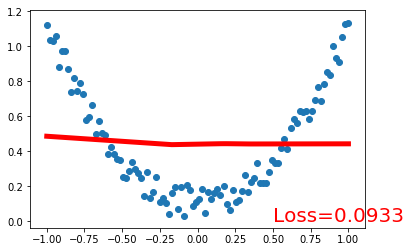

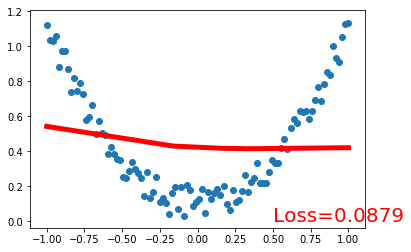

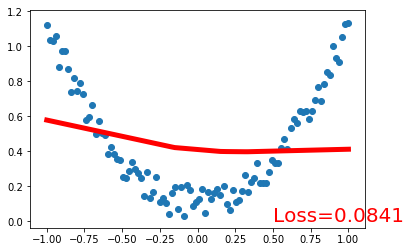

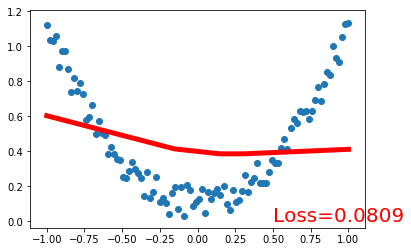

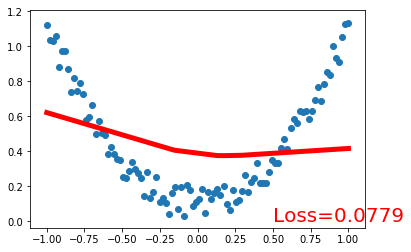

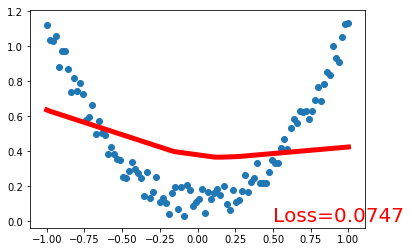

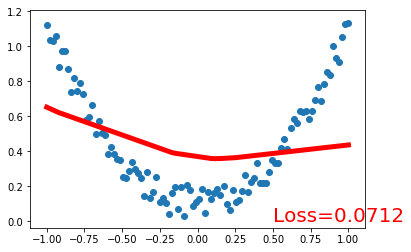

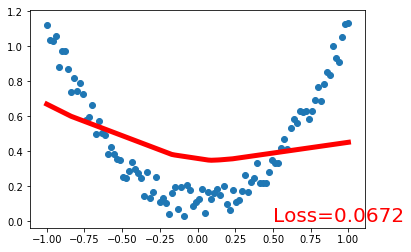

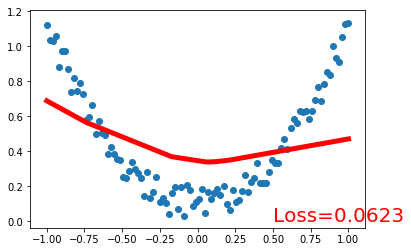

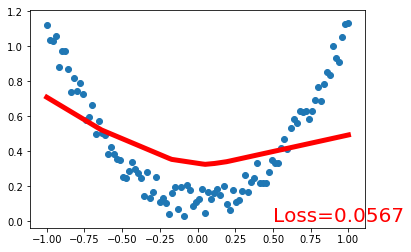

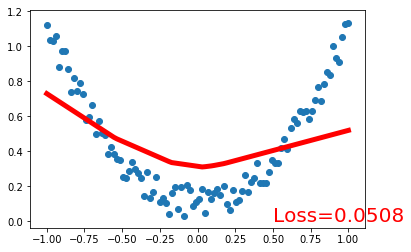

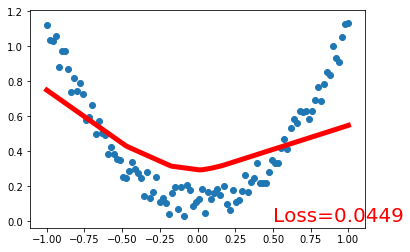

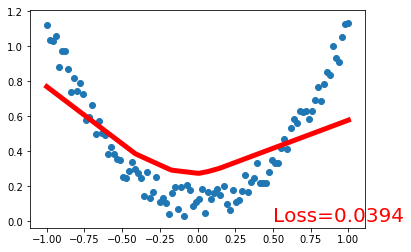

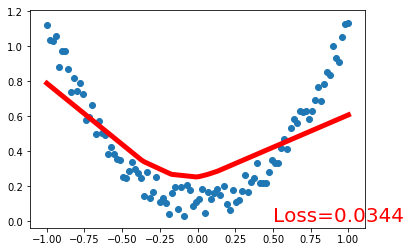

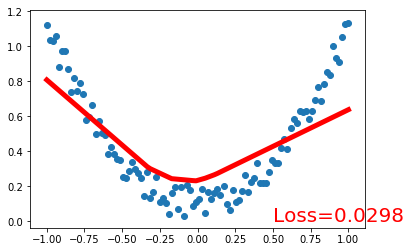

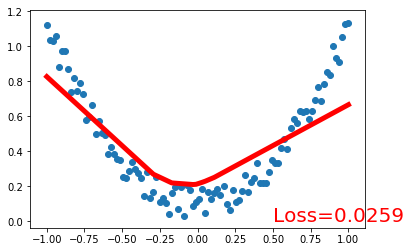

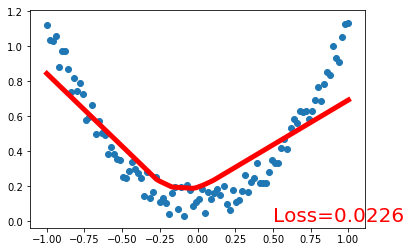

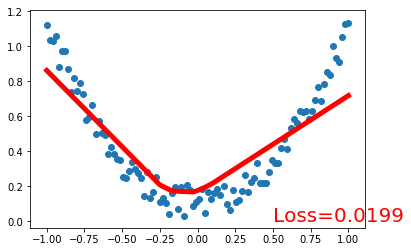

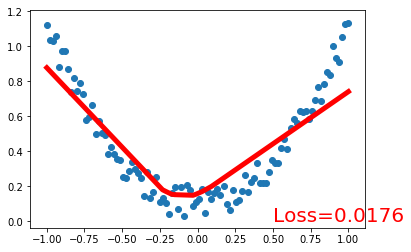

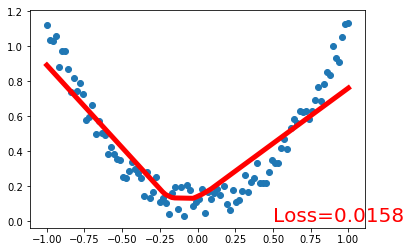

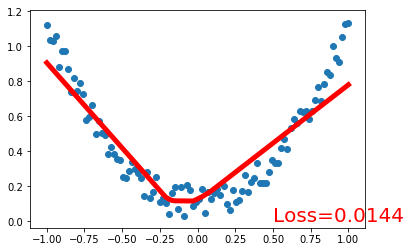

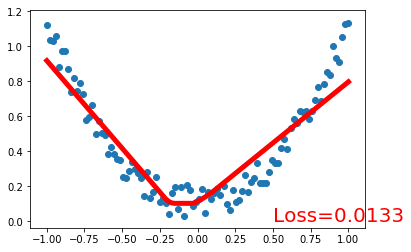

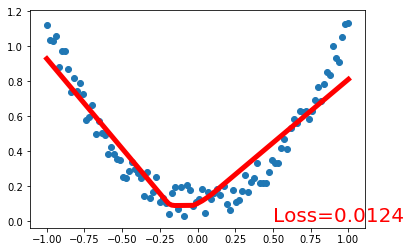

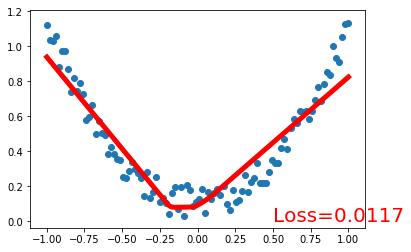

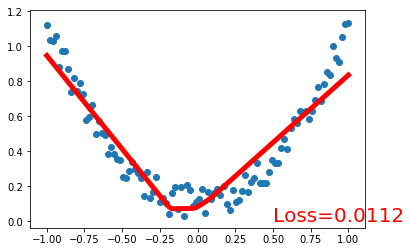

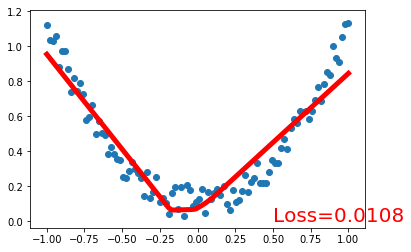

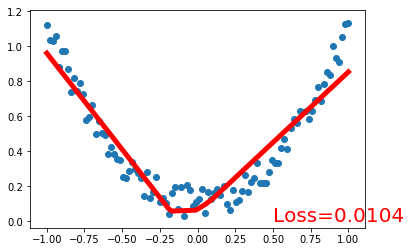

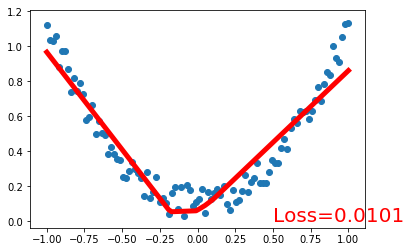

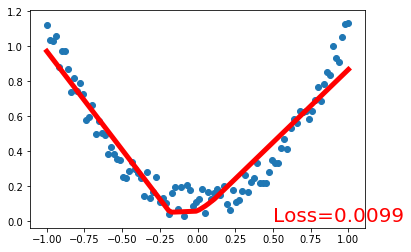

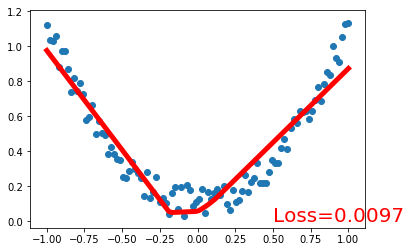

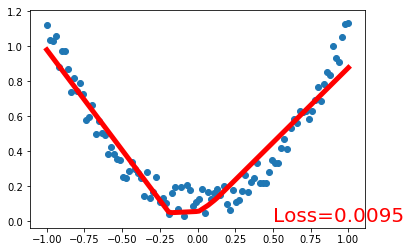

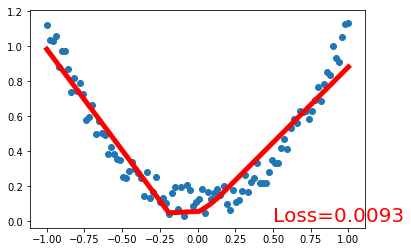

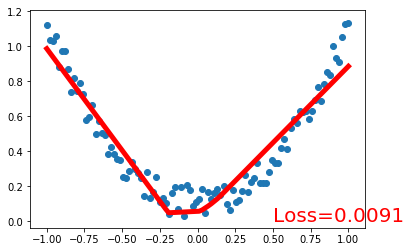

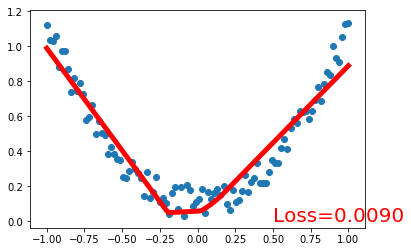

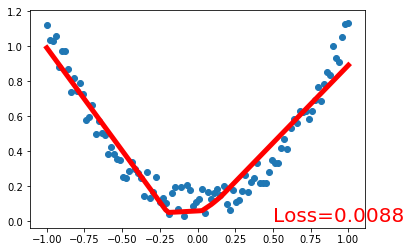

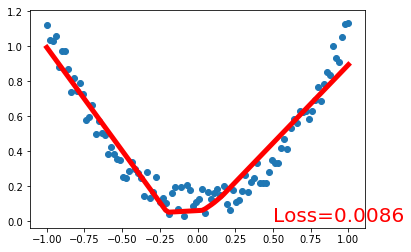

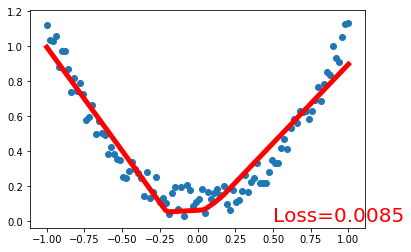

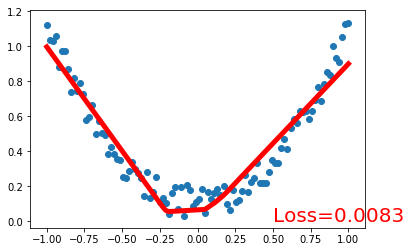

In [4]:

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1) unsqueeze将一维的数据变成二维的 torch中的数据是有维度的，
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

 
class Net(torch.nn.Module):     # 定义神经网络，继承了torch.nn.Module模块
    def __init__(self, n_feature, n_hidden, n_output):  # 搭建层所需要的信息
        super(Net, self).__init__()        # 搭图之前继承类
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层：包括输入特征个数和隐藏层个数
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层：包含隐藏神经元和输出个数

    def forward(self, x):                  # 搭建前向传递的过程
        x = F.relu(self.hidden(x))      # x先经过hidden层进行处理，然后再通过激励函数激活
        x = self.predict(x)             # 输出信息，输出不用激励函数，因为大多数回归问题中分布从负无穷到正无穷，用了激励函数可能会被截断
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network：1个输入，10个隐藏神经元，1个输出
print(net)  # net architecture


optimizer = torch.optim.SGD(net.parameters(), lr=0.2)   # 接下来进行神经网络的优化，优化神经网络的参数，给定学习效率，一般小于1
loss_func = torch.nn.MSELoss()  # 用均方差处理回归问题的损失函数

plt.ion()   # something about plotting实时打印

for t in range(200):       # 开始训练
    prediction = net(x)     # input x and predict based on x   predication在前，y真实值在后

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train 将所有net的梯度设为0
    loss.backward()         # backpropagation, compute gradients   损失反向传递
    optimizer.step()        # apply gradients      优化梯度

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()
